In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Import libraries
from __future__ import division
from scipy import stats
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set(style="ticks", color_codes=True)
%matplotlib inline
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

import warnings
warnings.simplefilter(action='ignore')#, category=FutureWarning)

# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# missing data
def find_missing_data(df):
    #missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    if missing_data['Total'].max() > 0: print (missing_data.head(20))
    else: print ("No missing data.")

# Load Data and Explore 

In [8]:
!pip install -q xlrd
!git clone https://github.com/juggernautTress/EWeiss-Data.git

fatal: destination path 'EWeiss-Data' already exists and is not an empty directory.


In [9]:

# Input data files are available in the "Eweiss-Data/" directory.
bckgrnd = pd.read_excel('EWeiss-Data/UC1.xlsx', 'Background', index_col=None)
flwseeds = pd.read_excel('EWeiss-Data/UC1.xlsx', 'Data', index_col=None)
# bckgrnd.dropna(axis=0, how='all') #remve all row where all value is 'NaN' exists
# Any results will be writen to the current directory are saved as output.
flwseeds.head() ## Nominal / Categorical Data

,Unnamed: 0,STORE CODE,Ageratum Blue,Alyssum Purple,Alyssum White,Alyssum Yellow,Anthurium Mix,Aster Blue,Aster Double Mix,Barcome Mix Calendula Orange,...,Poppy Red,Rudbeckia,Stock Mix,Stock White,Sweet Pea Mix,Sweet Pea Pink,Sweet Pea Red,Sweet Pea White,Sweet Sultan,Sweet William
0,NaN,1101,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
1,NaN,1153,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
2,NaN,1228,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
3,NaN,1283,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
4,NaN,1305,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0


In [10]:
flwseeds = flwseeds.drop(["Unnamed: 0"], axis=1)
flwseeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 57 columns):
STORE CODE                           1601 non-null int64
Ageratum Blue                        1601 non-null int64
Alyssum Purple                       1601 non-null int64
Alyssum White                        1601 non-null int64
Alyssum Yellow                       1601 non-null int64
Anthurium Mix                        1601 non-null int64
Aster Blue                           1601 non-null int64
Aster Double Mix                     1601 non-null int64
Barcome Mix Calendula Orange         1601 non-null int64
Calendula Gold                       1601 non-null int64
Candytuft Mix Carnation Red          1601 non-null int64
Candytuft White                      1601 non-null int64
Carnation Mix                        1601 non-null int64
Carnation Yellow Carnations White    1601 non-null int64
Cereopsis                            1601 non-null int64
Chrysanthemum Mix                    1

*Check for missing data*

In [11]:
draw_missing_data_table(flwseeds) ## None

,Total,Percent
Sweet William,0,0.0
Holly Hock,0,0.0
Gypsophila White,0,0.0
Godetia,0,0.0
Gazania Mix,0,0.0
Flowering Kale Mix,0,0.0
Delphinium,0,0.0
Daisy White,0,0.0
Cornflower Mix,0,0.0
Cleome Rose,0,0.0


In [12]:
flwseeds["STORE CODE"].unique().size ## all unique store codes ?

1601

*Distribution Plots*

In [13]:
initStats = flwseeds.describe()
initStats = initStats.drop(columns =["STORE CODE"])
initStats

,Ageratum Blue,Alyssum Purple,Alyssum White,Alyssum Yellow,Anthurium Mix,Aster Blue,Aster Double Mix,Barcome Mix Calendula Orange,Calendula Gold,Candytuft Mix Carnation Red,...,Poppy Red,Rudbeckia,Stock Mix,Stock White,Sweet Pea Mix,Sweet Pea Pink,Sweet Pea Red,Sweet Pea White,Sweet Sultan,Sweet William
count,1601.000000,1601.000000,1601.000000,1601.0,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,...,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,0.086196,0.006871,0.001874,1.0,0.998126,0.001874,0.000625,0.000625,0.999375,0.514678,...,0.003748,0.003748,0.000625,0.000625,0.981262,0.978139,0.607745,0.971268,0.002498,0.008120
std,0.280741,0.082630,0.043261,0.0,0.043261,0.043261,0.024992,0.024992,0.024992,0.499941,...,0.061122,0.061122,0.024992,0.024992,0.135642,0.146276,0.488406,0.167105,0.049937,0.089772
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,mean,std,count,Name
36,0.003748,0.061122,6,Poppy Red
37,0.003748,0.061122,6,Marigold Red Jafri
38,0.003748,0.061122,6,Rudbeckia
39,0.003123,0.055814,5,Petunia Double Mix
40,0.002498,0.049937,4,Sweet Sultan
41,0.002498,0.049937,4,Phlox Mix
42,0.001874,0.043261,3,Alyssum White
43,0.001874,0.043261,3,Aster Blue
44,0.001874,0.043261,3,Carnation Mix
45,0.001874,0.043261,3,Linum Red


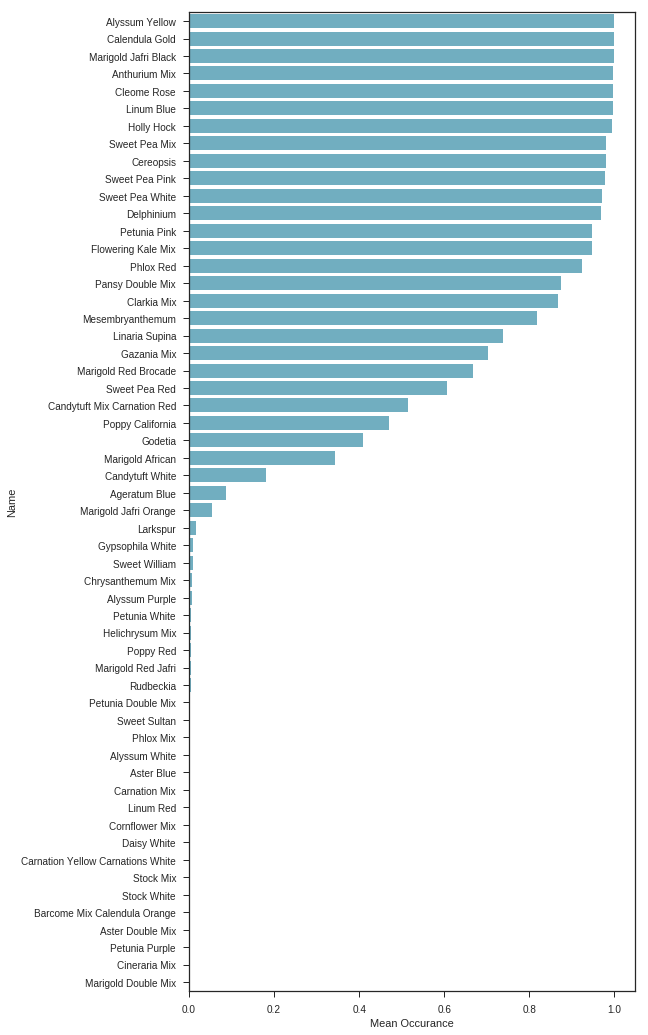

In [14]:
flw_names = list(flwseeds.columns.values)[1:]

initStats = pd.DataFrame(columns=["mean","std"])
initStats["mean"]=flwseeds.drop(columns =["STORE CODE"]).mean();
initStats["std"]=flwseeds.drop(columns =["STORE CODE"]).std();
initStats["count"]=flwseeds.drop(columns =["STORE CODE"]).sum();
initStats["Name"]=flw_names
# sort df by Count column
initStats = initStats.sort_values(['mean'], ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(8, 18))
sns.barplot(initStats["mean"],initStats.Name,color="c")
plt.xlabel ("Mean Occurance")

# print ("Most uncommon seeds: \n",initStats.tail(20))
initStats.tail(20)

Everybody orders Alyssum Y. and more than 95% order Calendula Gold, Marigold Jafri Black, Anthurium Mix, Cleome Rose, Linum Blue, Holly Hock, Sweet Pea Mix, Cereopsis, Sweet Pea Pink, Sweet Pea White and Delphinium. The rest of the flowers on the list would benefit most from sale recommendations.

min purchase: 4 max purchase: 30


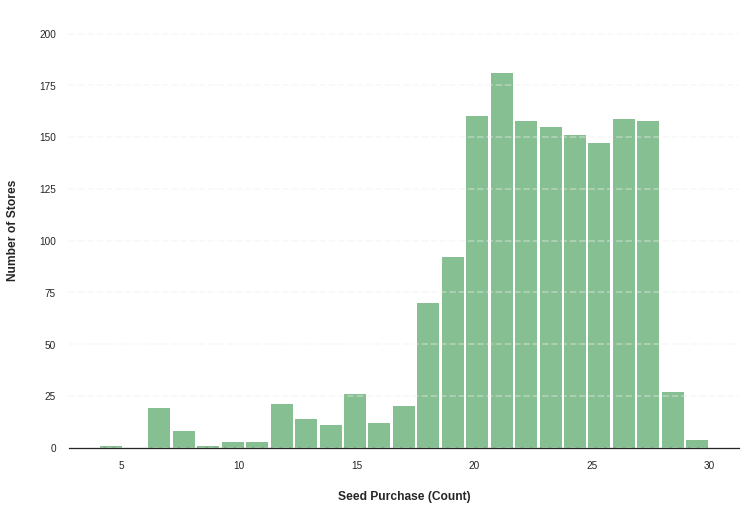

In [15]:
## Descriptio of seed sales / store
flwseeds['Total'] = flwseeds.drop(["STORE CODE"], axis=1).sum(axis=1)
ax = flwseeds.hist(column='Total',bins=25, grid=False, figsize=(12,8), \
                              color='#86bf91', rwidth=0.9)
ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", \
              top="off", labelbottom="on", left="off", right="off", labelleft="on")
    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, \
                color='#eeeeee', zorder=1)
    # Remove title
    x.set_title("")
    # Set x-axis label
    x.set_xlabel("Seed Purchase (Count)", labelpad=20,\
               weight='bold', size=12)
    # Set y-axis label
    x.set_ylabel("Number of Stores", labelpad=20, weight='bold', size=12)

print ("min purchase:", flwseeds.Total.min(),\
                         "max purchase:", flwseeds.Total.max())

Most of the stores buy anywhere between 20 and 27 seeds.

# 1. Nearest Neighbours based clustering of stores

In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.1, random_state=0)
X= flwseeds.drop(columns=['Total','STORE CODE'])
split_index = rs.split(X)
train_index, test_index = list(split_index)[0]
X_train0 = X.iloc[train_index]
X_test0 = X.iloc[test_index]
X_test_STORECODE0 = flwseeds.iloc[test_index]["STORE CODE"]
neigh0 = NearestNeighbors(n_neighbors=15).fit(X_train0)

In [0]:
from numpy.random import choice as sample
def hide_seeds(ori_vector=None,fraction_to_hide=None, k = None):
  seeds_bought = list(ori_vector.columns[(ori_vector >0 ).iloc[0]])
  num_of_purchases = len(seeds_bought)
  if k == None: 
    num_2hide = int(num_of_purchases * fraction_to_hide)
    if num_2hide < 1: num_2hide =1 #at least one hidden
    if num_2hide == num_of_purchases: num_2hide -= 1 #at least one purchase
  else:
    num_2hide = num_of_purchases - k
    if num_2hide < 1:
      #print ("choose another query",num_of_purchases,k)
      return None, None

  seeds_hidden = sample(seeds_bought,num_2hide,replace=False)
  ori_vector[seeds_hidden] = 0
  return ori_vector, seeds_hidden

''' User-based Collaborative Filtering '''
def kernel(x,y,sigma): 
  return np.exp(-((x-y)**2)/(2*sigma**2))
def Recommendation(nnModel,query,stores,threshold=0.,popularityBias_On=True,scoreType='pearson'):
  #1. find stores with similar purchases as the query
  neighbours = nnModel.kneighbors(query,return_distance=False)[0] #like array index
  #2. get purchases by these users and sort by item affinity
  #print (neighbours, stores.shape[0])
  store_set = stores.iloc[neighbours]
  store_set = store_set.loc[:,store_set.any()] ## drop items with zero affinity
  score = store_set.sum(axis=0).astype(float) ## sum seed occurances
  if not popularityBias_On:
    '''
    If a seed is popular among many stores, it is bound to occur with a higher 
    frequency in local neighbourhoods of stores. This might bias the scale of 
    other "unpopular" seed scores comparitively:: introducing a simple smoothing 
    function to tackle this problem
    '''
    popularity = initStats[initStats["Name"].isin(store_set.columns.values)]
    popularity["mean"] *= 1000.#/= initStats["mean"].max()
    pop_score = [kernel(score[name].astype(float),neighbours.size,\
                 popularity[popularity["Name"]==name]["mean"].values[0]) \
                                  for name in store_set.columns.values]
    pop_score /= max(pop_score)
    score = pd.Series(pop_score,popularity["Name"])
    #print (popularity)
  else:
    if scoreType == 'simple':
      score /= neighbours.size
      score = score[score>threshold].sort_values(ascending=False)
    elif scoreType== 'pearson':
      ### Using Pearson Correlations (within neighbours)
      score = store_set.corr(method='pearson')
      score.loc["Total"] = score[score.columns].sum(axis=1)
      score  = score.loc["Total"].sort_values(ascending=False)
  return score


Test Example

 For a store that bought --  ['Alyssum Yellow', 'Anthurium Mix', 'Calendula Gold', 'Cereopsis', 'Clarkia Mix', 'Cleome Rose', 'Gypsophila White', 'Holly Hock', 'Marigold African', 'Mesembryanthemum', 'Pansy Double Mix', 'Phlox Red', 'Poppy California', 'Sweet Pea Mix', 'Sweet Pea Red']
Did the recommender system recommend all seeds hidden in the test set? -- False [expected recommended seeds marked in red]


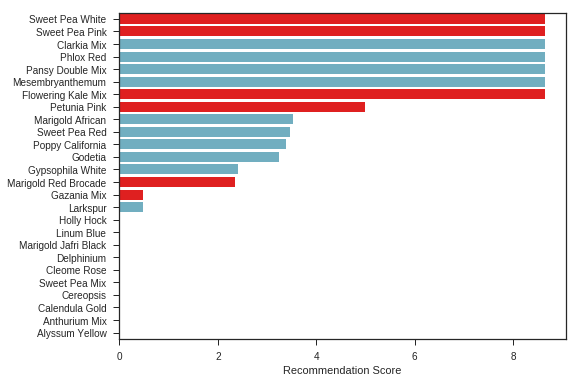

In [68]:
#example query
np.random.seed(20)  
while 1:
  store_query =  X_test0.sample(1)
  # hide a few purchases for testing purposes
  store_query, test_recommn = hide_seeds(store_query,k=15) # k--[6,29]
  if isinstance(store_query,pd.DataFrame): 
    break

  ## stop cell
## test the query:
score = Recommendation(neigh0,store_query,X_train0,popularityBias_On=1)

print (" For a store that bought -- ",\
    list(store_query.columns[(store_query == 1).iloc[0]]))#,\
               #"\n\n Recommendation \t\t Score\n\n",\
                #score)
plt.figure(figsize=(8,6))
clrs = ['red' if (x in test_recommn) else 'c' for x in list(score.index)]
sns.barplot( score.values, score.index , palette=clrs)
plt.xlabel("Recommendation Score")

print ("Did the recommender system recommend all seeds hidden in the test set? --",\
        set(test_recommn).issubset(score.index),\
        "[expected recommended seeds marked in red]")


In [0]:
from __future__ import division
from sklearn.metrics import accuracy_score, classification_report,\
                        zero_one_loss,jaccard_similarity_score

#3. compare to test:
'''
threshold_recmnd = 0.8 # strong recommedations only
k = 6 # number of items to use for nearest neighbour search
'''
def CrossValidate(threshold_recmnd=0.8,k=6,data_fraction=0.8,inputs=[]):
  neigh,X_train,X_test,X_test_STORECODE = inputs
  numberOfRows = X_test.shape[0]
  CV = pd.DataFrame(columns=["train_fraction","k","threshold","STOREindex","error"])
  i = 0; 
  preds = pd.DataFrame(columns = X_train.columns.values)
  target = pd.DataFrame(columns =X_train.columns.values)
  Xcol_size = X_train.shape[1]
  for index in X_test.index:
    store_query = X_test.loc[index].to_frame().T
    if k != None:
      store_query,test_recommn = hide_seeds(store_query,k=k)
    if not isinstance(store_query, pd.DataFrame): continue
    score = Recommendation(neigh, store_query,X_train,\
                        threshold=threshold_recmnd,popularityBias_On=1)
                        # probBias =1 (faster) and keep all preds
    #if not isinstance(score,pd.Series): continue
    if data_fraction < 0.999:
      target.loc[i,:] = np.zeros(Xcol_size)
      for col in test_recommn: target.ix[i,col]=1
      preds.loc[i,:] = np.zeros(Xcol_size)
      if not score.empty :
        incorrect_recommendations = set(test_recommn)-set(score.index)
        error = len(incorrect_recommendations)/len(test_recommn)
        for col in list(score.index): preds.ix[i,col] = 1
      else: 
        error =1.
    else: error = np.NaN
    CV.loc[i] = [1.-data_fraction,k,threshold_recmnd,X_test_STORECODE.iloc[i],error]
    i+=1
  if data_fraction < .999:
    preds = preds.reindex(X_test.columns, axis=1).astype(int)
    target = target.reindex(X_test.columns, axis=1).astype(int)
    ac = 1 - jaccard_similarity_score(target.values,preds.values,normalize=True)
    cr = classification_report(target, preds, target_names=X_train.columns.values)
    return CV, [cr, ac]#/preds.values.sum()]

  return CV



In [70]:
###### grid search to find optimal 'k' and 'threshold' values
print ("Grid Search")
k_values = [5,10,20] ## items for NN search
threshold_values = [0.5]# keep moderate and strong predictions
grid = pd.DataFrame()
for k in k_values:
  for threshold in threshold_values:
    for n_neighbors in [2,10,20,50]: ## number of neighbours to eval
      neigh0 = NearestNeighbors(n_neighbors=n_neighbors).fit(X_test0)
      grid_, _= CrossValidate(threshold,k,0.8,\
          [neigh0,X_train0,X_test0,X_test_STORECODE0])
      grid_["n_neighbors"] = [n_neighbors]*grid_.shape[0]
      grid = grid.append(grid_)
      print ("\t k:",k,"\t threshold:",threshold,"\t n_neighbors:",n_neighbors)

Grid Search
	 k: 5 	 threshold: 0.5 	 n_neighbors: 2
	 k: 5 	 threshold: 0.5 	 n_neighbors: 10
	 k: 5 	 threshold: 0.5 	 n_neighbors: 20
	 k: 5 	 threshold: 0.5 	 n_neighbors: 50
	 k: 10 	 threshold: 0.5 	 n_neighbors: 2
	 k: 10 	 threshold: 0.5 	 n_neighbors: 10
	 k: 10 	 threshold: 0.5 	 n_neighbors: 20
	 k: 10 	 threshold: 0.5 	 n_neighbors: 50
	 k: 20 	 threshold: 0.5 	 n_neighbors: 2
	 k: 20 	 threshold: 0.5 	 n_neighbors: 10
	 k: 20 	 threshold: 0.5 	 n_neighbors: 20
	 k: 20 	 threshold: 0.5 	 n_neighbors: 50


Text(0,0.5,'error')

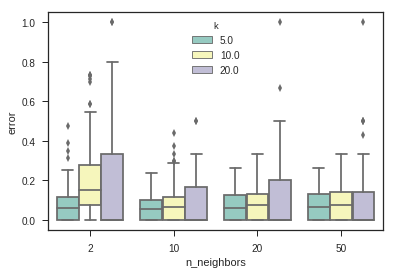

In [31]:
#data = CV[CV["k"] == 15]
#plt.scatter(data.threshold, data.error)
ax = sns.boxplot(x="n_neighbors", y="error", hue="k",\
                                data=grid, palette="Set3")
plt.xlabel("n_neighbors")
plt.ylabel("error")

When you train about 80% of the data: 
*   using >10 n_neighbors gives relatively the same results. 
*   'k' however seems to affect the accuracy. Larger 'k' values (more number of input items) should find better neighbourhood search results and thus result in better recommendations. << Test this in the Cross-Validation.




### Is the recommendation system "learning"?

In [0]:
def CV_parm(threshold=0.5,n_neighbors=25):
  print ("Cross Validate:  threshold=",threshold,"  n_neighbors=",n_neighbors)
  CV = pd.DataFrame()
  proportions = [.8,.6,.4,.2]
  res = pd.DataFrame(columns=["train_fraction","k","accuracy score"])
  for test_fraction in proportions:
    print (" \t testing ",test_fraction,"of data...")
    for k in [5,10,15]:
      print (" \t\t k=",k)
      rs = ShuffleSplit(n_splits=1,test_size=test_fraction,random_state=44)
      X = flwseeds.drop(columns=["Total","STORE CODE"])
      ## resetting X; not required but helps if running this cell independently
      split_index = rs.split(X)
      train_index,test_index = list(split_index)[0]
      X_train1 = X.iloc[train_index]
      X_test1 = X.iloc[test_index]
      X_test_STORECODE1 = flwseeds.iloc[test_index]["STORE CODE"]
      neigh1 = NearestNeighbors(n_neighbors=n_neighbors).fit(X_train1)
      CV_, report= CrossValidate(threshold,k,data_fraction=test_fraction,\
              inputs=[neigh1,X_train1,X_test1,X_test_STORECODE1])
      CV_["k"] = [k]*CV_.shape[0]
      CV = CV.append(CV_)
      res.loc[len(res),:] = [1-test_fraction,k,report[1]]
  return CV, res

In [43]:
'''
mse =[]
for test_fraction in proportions:
  _mse = CV[CV["test_fraction"] == test_fraction]["error"] **2 
  mse.append(_mse.mean()) 
plt.plot(proportions,mse,'ro')

##(or)
sns.boxplot(x="train_fraction",y="error",hue="k",\
                      data=CV,palette="Set1")
plt.ylabel('test error')
''' # The error evaluates what fraction of 'test' \
#     recommendations were predicted (given a threshold).
print ("Testing Accuracy of Recommendation System")

Testing Accuracy of Recommendation System


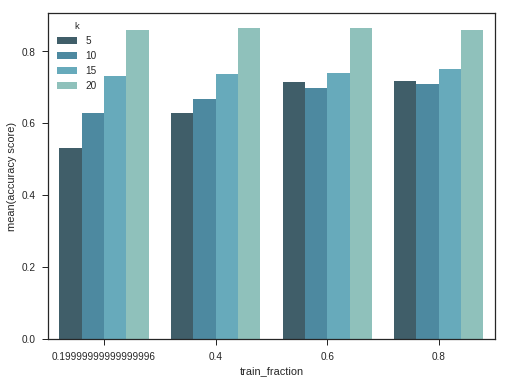

In [44]:
CV,res = CV_parm()
plt.figure(figsize=(8,6))
## Accuracy Score
sns.barplot(x="train_fraction",y="accuracy score", hue="k",\
                      data=res, palette="GnBu_d")


## Strong Recommedation (threshold >0.8)

Cross Validate:  threshold= 0.8   n_neighbors= 25
 	 testing  0.8 of data...
 		 k= 5
 		 k= 10
 		 k= 15
 		 k= 20
 	 testing  0.6 of data...
 		 k= 5
 		 k= 10
 		 k= 15
 		 k= 20
 	 testing  0.4 of data...
 		 k= 5
 		 k= 10
 		 k= 15
 		 k= 20
 	 testing  0.2 of data...
 		 k= 5
 		 k= 10
 		 k= 15
 		 k= 20


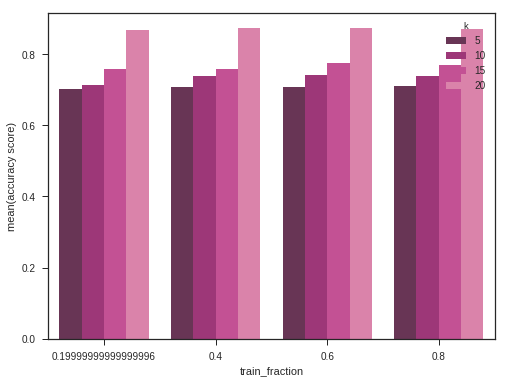

In [54]:
CV, res = CV_parm(threshold=0.8,n_neighbors=25)
plt.figure(figsize=(8,6))
sns.barplot(x="train_fraction", y="accuracy score", hue="k",\
                  data=res, palette="RdPu_d")

## To do: Implement SVD

```
`# This is formatted as code`
```

. SVD
* SVD will handle the problem of scalability and sparsity by  a larger dataset.
*  However, SVD provides little explanation to the reason that an item is recommended to an user.

# Edelweiss Recommendations

**Edelweiss wants this recommendation to be statistically correct. They also want to see if this data is meaningful enough to generate some decent recommendation or not. If Kayla says that this data is insufficient, then she needs to validate that with some statistical results. They also would want to see some stores and some seeds where they should focus primarily. Other than this analysis, if the Edelweiss CEO likes the approach, then he would want to do a pilot of a few stores. Kayla should help the CEO to selct store list along with the recommnedations.**

In [24]:
#### Seed stores to focus on:
## train all of the data 
X = flwseeds.drop(columns=['STORE CODE','Total'])
X_STORECODE = flwseeds["STORE CODE"]?
neighF = NearestNeighbors(n_neighbors=15).fit(X)
results = pd.DataFrame(columns=["STORE CODE", "Recommnd Strength"])
for index in X.index:
  store_query = X.loc[index].to_frame().T
  score = Recommendation(neighF,store_query,X,threshold=0.6,popularityBias_On=1)
  print (score)
  results = results.append([X_STORECODE.loc[index],score])
  break


Name
Poppy California        1.0
Sweet Pea White         1.0
Calendula Gold          1.0
Marigold Jafri Black    1.0
Anthurium Mix           1.0
Cleome Rose             1.0
Linum Blue              1.0
Holly Hock              1.0
Sweet Pea Mix           1.0
Cereopsis               1.0
Sweet Pea Pink          1.0
Delphinium              1.0
Sweet Pea Red           1.0
Petunia Pink            1.0
Flowering Kale Mix      1.0
Phlox Red               1.0
Pansy Double Mix        1.0
Clarkia Mix             1.0
Mesembryanthemum        1.0
Linaria Supina          1.0
Gazania Mix             1.0
Marigold Red Brocade    1.0
Alyssum Yellow          1.0
dtype: float64
Name
Godetia                        1.0
Candytuft Mix Carnation Red    1.0
Calendula Gold                 1.0
Marigold Jafri Black           1.0
Anthurium Mix                  1.0
Cleome Rose                    1.0
Linum Blue                     1.0
Holly Hock                     1.0
Sweet Pea Mix                  1.0
Cereopsis       

In [66]:
## select store: recommendation strength by store
print (results)


   STORE CODE Recommnd Strength  \
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN               NaN   
0         NaN               NaN   
1         NaN       

In [0]:
### Pilot Stores and seed recommendations